**Rio de Janeiro, 9 de Maio de 2016**

Grupo: **Carlos Mattoso **_[ **1210553** ]_ e **Gabriel Siqueira **_[ **1210689** ]_

Disciplina: **INF1335 - Introdução a Data Science com R e Python**

# Segundo Exercício para a G1

## Leitura Inicial dos Dados

In [38]:
options(repr.plot.width = 10)
options(repr.plot.height = 5)

load.lib <- function(lib.name, repos="https://cloud.r-project.org/") {
    if (!require(lib.name, character.only=T))
        install.packages(lib.name, repos)
    library(lib.name, character.only=T)
}
load.lib("knitr")
load.lib("ggplot2")

printf <- function(...) invisible(print(sprintf(...))) # source: http://stackoverflow.com/a/13023329
# Usage example: print("%s %d", Number, 5)

dir.create("data", showWarnings = FALSE)

# Baixa arquivo de dados de desemprego da OECD

if (!file.exists("data/data.csv"))    
    download.file("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.UNEMP.TOT../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", 
                  destfile="data/data.csv", method="curl")
    
# Baixa arquivo para conversão de código de país para nome de país
if (!file.exists("data/country_code_name.csv"))
    download.file("https://gist.githubusercontent.com/GabrielSiq/14a9dafd24e8b7bd2e383f497e2885f9/raw/5c23771f1c6a54849f3fc8b82adfada86a8fef46/CountryCodes.csv",
                  destfile="data/country_code_name.csv", method="curl")
country.code.to.name = read.csv("data/country_code_name.csv", stringsAsFactors=F)[,c("CODE", "Country")]
get.country.name <- function(location) {
    country.code.to.name[country.code.to.name$CODE == location, "Country"]
}

## Examinando os Dados

In [5]:
# Leitura e limpeza básica; já lê strings como `strings` e não `Factors`
data = read.csv("data/data.csv", fileEncoding="UTF-8", stringsAsFactors=F)

# Remove colunas desnecessárias, que só tem um único valor
data = within(data, rm(list=c("INDICATOR","SUBJECT","MEASURE")))

str(data)

# Lê tabela de conversão de código de país para nome de país

str(country.code.to.name)

'data.frame':	9123 obs. of  5 variables:
 $ LOCATION  : chr  "AUS" "AUS" "AUS" "AUS" ...
 $ FREQUENCY : chr  "A" "A" "A" "A" ...
 $ TIME      : chr  "1967" "1968" "1969" "1970" ...
 $ Value     : num  1.88 1.85 1.8 1.62 1.93 ...
 $ Flag.Codes: chr  "" "" "" "" ...
'data.frame':	237 obs. of  2 variables:
 $ CODE   : chr  "ABW" "AFG" "AFRI" "AGO" ...
 $ Country: chr  "Aruba" "Afghanistan" "Africa" "Angola" ...


### a

In [6]:
printf("Há %d registros.", nrow(data))
printf("Há %d atributos, com os nomes: {%s}.", ncol(data), paste(names(data), collapse=", "))

[1] "Há 9123 registros."
[1] "Há 5 atributos, com os nomes: {LOCATION, FREQUENCY, TIME, Value, Flag.Codes}."


### b

In [7]:
printf("Há %d países e regiões incluídos nos dados.", length(unique(data$LOCATION)))

[1] "Há 42 países e regiões incluídos nos dados."


## Extraindo Subconjuntos de Dados

### a

In [8]:
# Mantém apenas os indicadores anuais
data.year = data[nchar(data$TIME) == 4,]
data.year$TIME = as.numeric(data.year$TIME) # certifica-se de que os anos estão em formato `numeric`

printf("Permanecem %d registros, contra %d registros originais.", nrow(data.year), nrow(data))

[1] "Permanecem 1022 registros, contra 9123 registros originais."


### b

In [9]:
number.of.years = length(unique(data.year$TIME))

printf("Há dados de %d anos.", number.of.years)

[1] "Há dados de 61 anos."


### c

In [10]:
first.year = min(data.year$TIME)
last.year = max(data.year$TIME)
printf("O primeiro ano do período é %d e o último, %d.", first.year, last.year)

[1] "O primeiro ano do período é 1955 e o último, 2015."


### d

In [11]:
data.period = c()

# Gera o registro para cada ano
for (country in unique(data$LOCATION)) {
    first.year = min(data.year[data.year$LOCATION == country,"TIME"])
    last.year  = max(data.year[data.year$LOCATION == country,"TIME"])
    data.period = rbind(data.period, c(country, first.year, last.year))
}
data.period = data.frame(data.period, stringAsFactors=F)[,1:3]
names(data.period) = c("location", "first.year", "last.year")

# ordena segundo `first.year` e depois `location`
data.period = data.period[order(data.period$location),]
data.period = data.period[order(data.period$first.year),]
rownames(data.period) = 1:nrow(data.period)

kable(data.period, row.names=T)



|   |location |first.year |last.year |
|:--|:--------|:----------|:---------|
|1  |CAN      |1955       |2015      |
|2  |JPN      |1955       |2015      |
|3  |USA      |1955       |2015      |
|4  |NZL      |1956       |2015      |
|5  |DEU      |1962       |2015      |
|6  |AUS      |1967       |2015      |
|7  |AUT      |1969       |2015      |
|8  |IDN      |1976       |2014      |
|9  |BRA      |1981       |2014      |
|10 |CHL      |1986       |2015      |
|11 |MEX      |1987       |2015      |
|12 |KOR      |1989       |2015      |
|13 |RUS      |1993       |2015      |
|14 |SVK      |1994       |2015      |
|15 |DNK      |1995       |2015      |
|16 |ISR      |1995       |2015      |
|17 |FIN      |1998       |2015      |
|18 |GRC      |1998       |2015      |
|19 |IRL      |1998       |2015      |
|20 |ITA      |1998       |2015      |
|21 |PRT      |1998       |2015      |
|22 |BEL      |1999       |2015      |
|23 |CZE      |1999       |2015      |
|24 |ESP      |1999    

### e

In [12]:
full.year.period = first.year:last.year
actual.years = sort(unique(data.year$TIME))
missing.years = setdiff(full.year.period, actual.years)

# Descomente para checar visualmente
# full.year.period
# actual.years

if (length(missing.years) != 0) {
    printf("Não há dados para os seguintes anos: %s.", paste(missing.years, collpse=', '))
} else {
    printf("Há dados para todos os anos!")
}

[1] "Há dados para todos os anos!"


### f

In [13]:
first.year.bra = min(data.year[data.year$LOCATION == "BRA","TIME"])
printf("O primeiro ano que a OECD tem dados do Brasil é %d.", first.year.bra)

[1] "O primeiro ano que a OECD tem dados do Brasil é 1981."


### g

In [14]:
period.bra = data.year[data.year$LOCATION == "BRA","TIME"]
printf("A OECD tem registros de desemprego do Brasil para %d anos: {%s}",
       length(period.bra), paste(period.bra, collapse=', '))

[1] "A OECD tem registros de desemprego do Brasil para 34 anos: {1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014}"


## Estatísticas Descritivas Básicas

### a

In [15]:
min.unemployment = data.year[which.min(data.year$Value),]
printf("O país %s {%s} no ano %d teve o menor índice de desemprego, de valor %f", 
       min.unemployment$LOCATION, get.country.name(min.unemployment$LOCATION),
       min.unemployment$TIME, min.unemployment$Value)

max.unemployment = data.year[which.max(data.year$Value),]
printf("O país %s {%s} no ano %d teve o maior índice de desemprego, de valor %f", 
       max.unemployment$LOCATION, get.country.name(max.unemployment$LOCATION),
       max.unemployment$TIME, max.unemployment$Value)

[1] "O país NZL {New Zealand} no ano 1956 teve o menor índice de desemprego, de valor 0.000000"
[1] "O país GRC {Greece} no ano 2013 teve o maior índice de desemprego, de valor 27.467150"


### b

In [16]:
unemployment.mean = aggregate(data.year[, 4], list(data.year$LOCATION), mean)
names(unemployment.mean) = c("Country", "Mean")
kable(unemployment.mean)



|Country |      Mean|
|:-------|---------:|
|AUS     |  6.047991|
|AUT     |  3.525880|
|BEL     |  7.863202|
|BRA     |  9.378923|
|CAN     |  7.322404|
|CHE     |  4.373808|
|CHL     |  8.155256|
|COL     | 10.620464|
|CZE     |  7.042291|
|DEU     |  5.112926|
|DNK     |  5.728689|
|EA19    |  9.758859|
|ESP     | 15.743807|
|EST     |  9.881497|
|EU28    |  9.086584|
|FIN     |  8.614937|
|FRA     |  8.813407|
|GBR     |  6.034342|
|GRC     | 14.159520|
|HUN     |  7.929446|
|IDN     |  4.863846|
|IRL     |  7.991111|
|ISL     |  4.530614|
|ISR     |  7.759126|
|ITA     |  9.344096|
|JPN     |  2.746038|
|KOR     |  3.429012|
|LUX     |  4.998544|
|MEX     |  3.865876|
|NLD     |  4.434258|
|NOR     |  3.488686|
|NZL     |  3.677961|
|OECD    |  7.106375|
|POL     | 12.847494|
|PRT     |  8.734213|
|RUS     |  7.883233|
|SVK     | 14.299945|
|SVN     |  7.064655|
|SWE     |  7.016449|
|TUR     |  9.648080|
|USA     |  6.003552|
|ZAF     | 24.153125|

### c

In [17]:
min.unemployment.mean = unemployment.mean[which.min(unemployment.mean$Mean),]
max.unemployment.mean = unemployment.mean[which.max(unemployment.mean$Mean),]
printf("O país com a menor taxa média é %s {%s} com um valor de %f", 
       min.unemployment.mean$Country, get.country.name(min.unemployment.mean$Country), min.unemployment.mean$Mean)
printf("O país com a maior taxa média é %s {%s} com um valor de %f", 
       max.unemployment.mean$Country, get.country.name(max.unemployment.mean$Country), max.unemployment.mean$Mean)

[1] "O país com a menor taxa média é JPN {Japan} com um valor de 2.746038"
[1] "O país com a maior taxa média é ZAF {South Africa} com um valor de 24.153125"


### Distribuição das Taxas de Desemprego por País

#### a

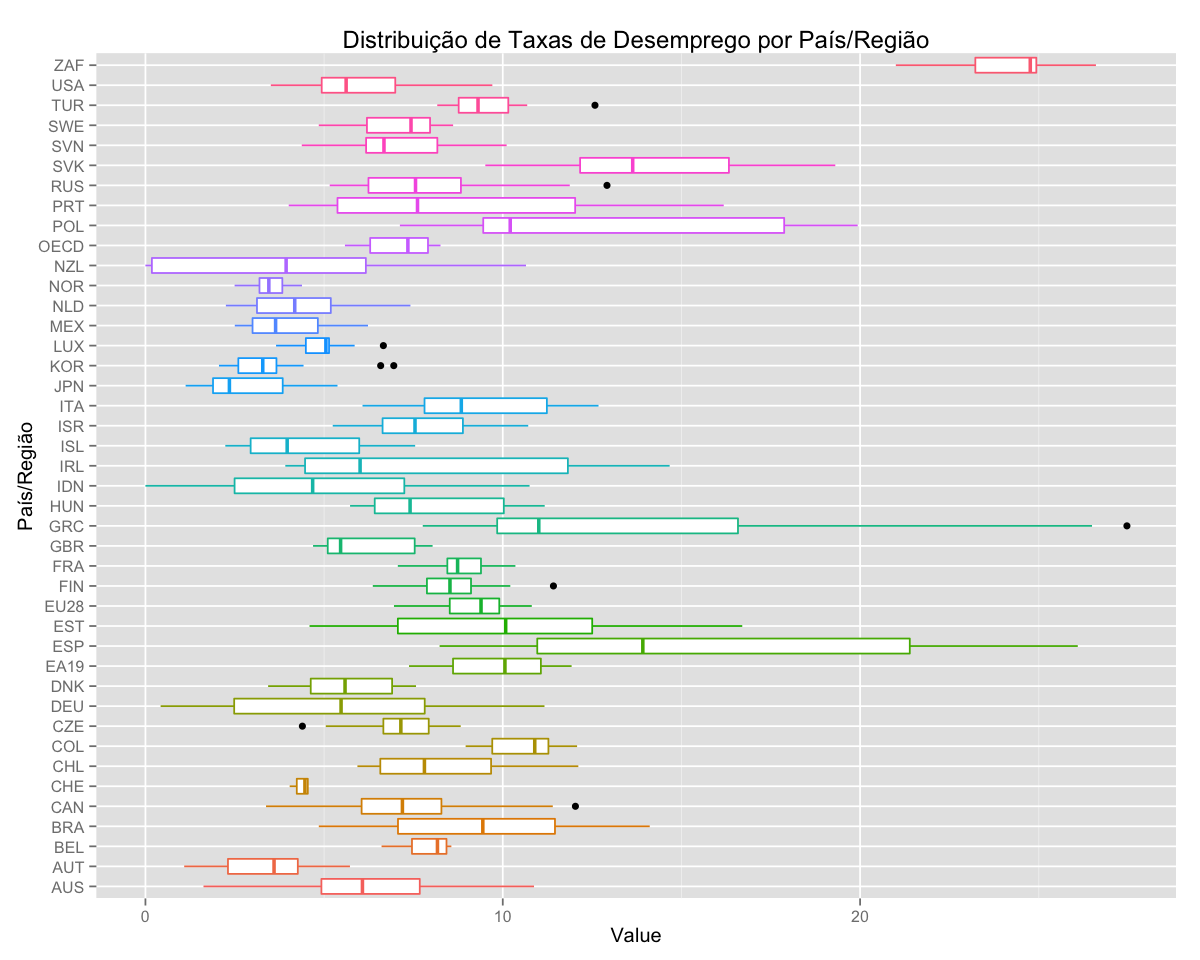

In [18]:
options(repr.plot.height = 8)
ggplot(data.year[,c("LOCATION", "Value")], aes(factor(LOCATION), Value, color=LOCATION)) + geom_boxplot() +
    coord_flip() + xlab("País/Região") + ggtitle("Distribuição de Taxas de Desemprego por País/Região") +
    theme(legend.position='none')

#### b

In [19]:
# obtém o max unemployment
max.unemployment = aggregate(data.year[, 4], list(data.year$LOCATION), max) 
names(max.unemployment) = c("Country", "Max")

# obtém o min unemployment
max.min.unemployment = cbind(max.unemployment, 
                           "Min" = aggregate(data.year[, 4], list(data.year$LOCATION), min)$x) 

# calcula a Amplitude por país
max.min.unemployment$Amplitude = max.min.unemployment$Max - max.min.unemployment$Min 
amplitude.unemployment = max.min.unemployment[, c("Country", "Amplitude")]

# ordena decrescentemente segundo amplitude
amplitude.unemployment = amplitude.unemployment[order(amplitude.unemployment$Amplitude, decreasing=T),]
kable(amplitude.unemployment, row.names=F)



|Country | Amplitude|
|:-------|---------:|
|GRC     | 19.706389|
|ESP     | 17.859922|
|POL     | 12.811725|
|PRT     | 12.173850|
|EST     | 12.110486|
|IRL     | 10.755482|
|IDN     | 10.750000|
|DEU     | 10.743246|
|NZL     | 10.650000|
|SVK     |  9.793776|
|BRA     |  9.261426|
|AUS     |  9.249670|
|CAN     |  8.658330|
|RUS     |  7.759170|
|ITA     |  6.604526|
|USA     |  6.200000|
|CHL     |  6.182622|
|SVN     |  5.733544|
|ZAF     |  5.600000|
|ISR     |  5.470993|
|HUN     |  5.446750|
|ISL     |  5.313059|
|NLD     |  5.164885|
|FIN     |  5.055383|
|KOR     |  4.891667|
|AUT     |  4.638572|
|EA19    |  4.550226|
|CZE     |  4.431246|
|TUR     |  4.413983|
|JPN     |  4.250000|
|DNK     |  4.139322|
|EU28    |  3.856841|
|SWE     |  3.759945|
|MEX     |  3.727488|
|GBR     |  3.345387|
|FRA     |  3.290918|
|COL     |  3.119166|
|LUX     |  3.002801|
|OECD    |  2.674617|
|BEL     |  1.953778|
|NOR     |  1.885311|
|CHE     |  0.512082|

#### c

In [20]:
printf("O país com a maior variação da taxa de desemprego, de valor %.2f%%, é %s {%s}.", 
       amplitude.unemployment$Amplitude[1], amplitude.unemployment$Country[1], 
       get.country.name(amplitude.unemployment$Country[1]))

[1] "O país com a maior variação da taxa de desemprego, de valor 19.71%, é GRC {Greece}."


## Gráficos

### Evolução das Taxas de Desemprego

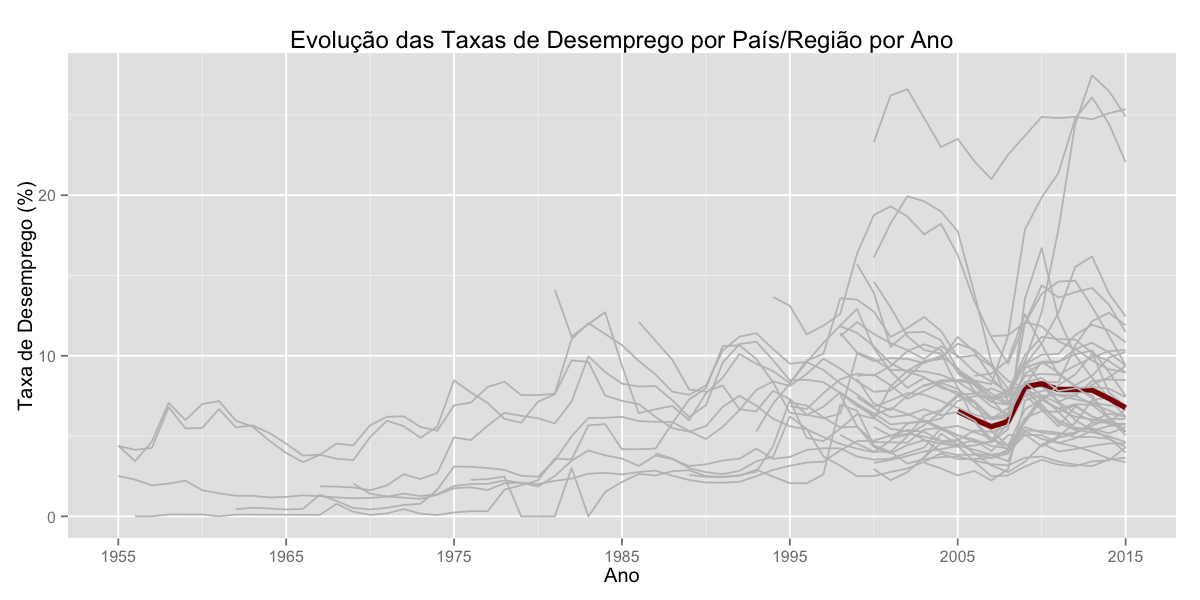

In [21]:
locations = ((unique(data.year$LOCATION)))
locations = locations[order(locations)]

# Define as cores e tamanhos das linhas por país/região
lines.colors = rep("gray75", length(locations))
lines.colors[locations == "OECD"] = "darkred"

lines.sizes = rep(0.5, length(locations))
lines.sizes[locations == "OECD"] = 1.5

# Determina o período
first.year = min(data.year$TIME)
last.year  = max(data.year$TIME)

options(repr.plot.height = 5)
ggplot(data=data.year, aes(x=TIME, y=Value, group=LOCATION, color=LOCATION, size=LOCATION)) + geom_line() + 
    scale_color_manual(values=lines.colors) + scale_size_manual(values=lines.sizes) +
    xlab("Ano") + ylab("Taxa de Desemprego (%)") + scale_x_continuous(breaks=seq(first.year,last.year,10)) + 
    ggtitle("Evolução das Taxas de Desemprego por País/Região por Ano") + theme(legend.position='none')

### Países com maior amplitude de variação

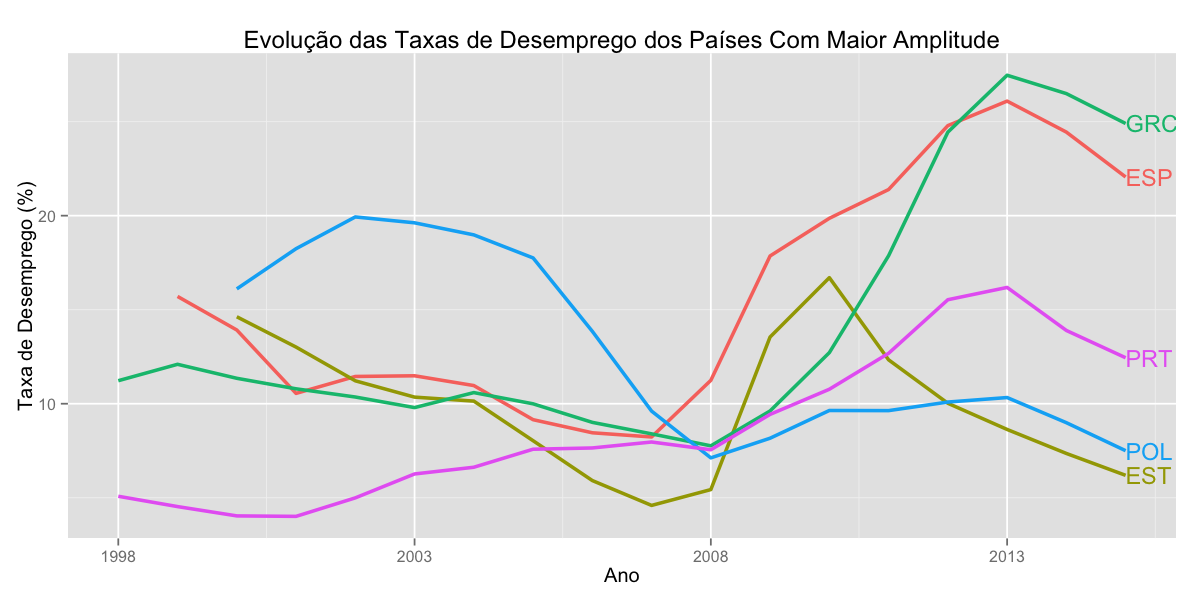

In [22]:
top5.amplitude.unemployment = head(amplitude.unemployment[order(amplitude.unemployment$Amplitude, decreasing=T),],5)
v = top5.amplitude.unemployment$Country
top5 = data.year[data.year$LOCATION %in% v,]

first.year = min(data.year[data.year$LOCATION %in% v,"TIME"])
last.year  = max(data.year[data.year$LOCATION %in% v,"TIME"])

options(repr.plot.height = 5)
ggplot(data=top5, aes(x=TIME, y=Value, color=LOCATION)) + 
    geom_line(group=unique(top5$LOCATION[order(top5$LOCATION)]), size=1) + 
    scale_size_manual(values=lines.sizes) + scale_x_continuous(breaks=seq(first.year,last.year,5)) + 
    xlab("Ano") + ylab("Taxa de Desemprego (%)") + theme(legend.position = "none") +
    ggtitle("Evolução das Taxas de Desemprego dos Países Com Maior Amplitude") +
    geom_text(data = top5[top5$TIME == last.year,], aes(label = LOCATION), hjust=0, vjust=0.5)

### Países com Menor Variação

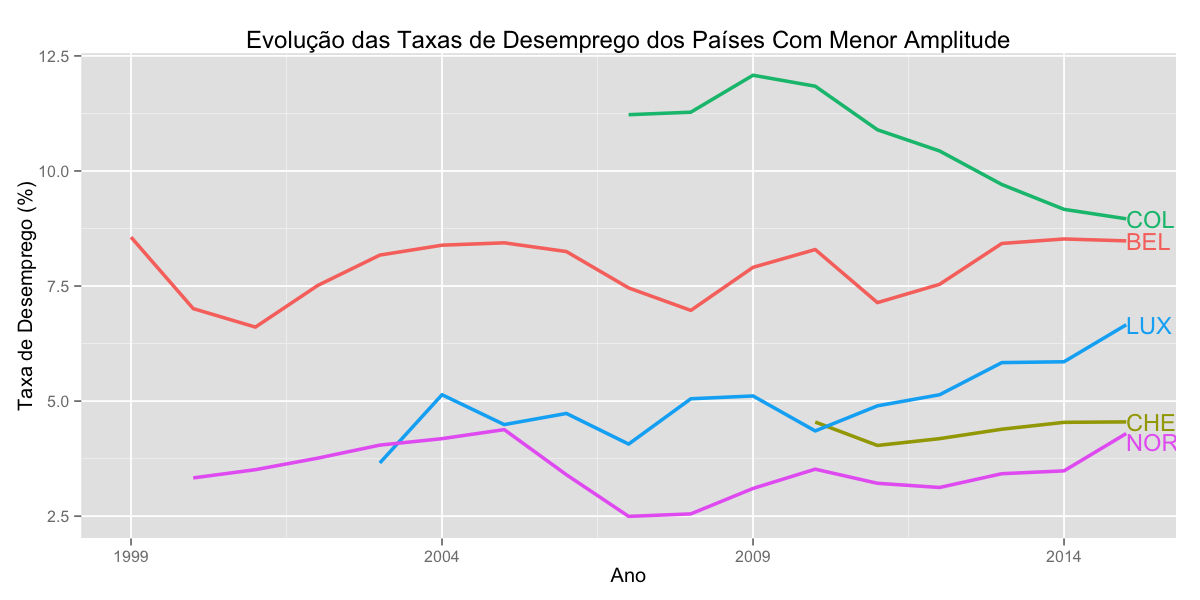

In [23]:
amplitude.unemployment = amplitude.unemployment[!(amplitude.unemployment$Country %in% c("OECD")),]
bottom5.amplitude.unemployment = head(amplitude.unemployment[order(amplitude.unemployment$Amplitude),],5)

v = bottom5.amplitude.unemployment$Country
bottom5 = data.year[data.year$LOCATION %in% v,]

first.year = min(data.year[data.year$LOCATION %in% v,"TIME"])
last.year  = max(data.year[data.year$LOCATION %in% v,"TIME"])

loc.vjust = rep(0.5, nrow(bottom5[bottom5$TIME == last.year,]))
loc.vjust[which(bottom5[bottom5$TIME == last.year,] == "NOR")] = 1 

options(repr.plot.height = 5)
ggplot(data=bottom5, aes(x=TIME, y=Value, color=LOCATION)) + 
    geom_line(group=unique(bottom5$LOCATION[order(bottom5$LOCATION)]), size=1) + 
    scale_size_manual(values=lines.sizes) + scale_x_continuous(breaks=seq(first.year,last.year,5)) + 
    xlab("Ano") + ylab("Taxa de Desemprego (%)") + labs(fill = "Código do País") +
    ggtitle("Evolução das Taxas de Desemprego dos Países Com Menor Amplitude") +
    geom_text(data = bottom5[bottom5$TIME == last.year,], aes(label = LOCATION), 
              hjust=0, vjust=loc.vjust) +
    theme(legend.position = "none")

## Relação entre Taxas de Desemprego e Produto Interno Bruto

In [27]:
if (!file.exists("data/gdp_data.csv"))
    download.file("https://stats.oecd.org/sdmx-json/data/DP_LIVE/.GDP.TOT../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en", 
                   destfile="data/gdp_data.csv", method="curl")
gdp.data = read.csv("data/gdp_data.csv", fileEncoding="UTF-8", stringsAsFactors=F)

# Faz o pareamento dos dados de PIB e de Desemprego
paired.gdp.unemp = merge.data.frame(data.year, gdp.data, by=c("LOCATION", "TIME"))
paired.gdp.unemp = paired.gdp.unemp[paired.gdp.unemp$MEASURE == "USD_CAP", c("LOCATION", "TIME", "Value.y", "Value.x")]

names(paired.gdp.unemp) = c("LOCATION", "TIME","GDP","UNEMPLOYMENT")

### Gráfico de Dispersão

#### a

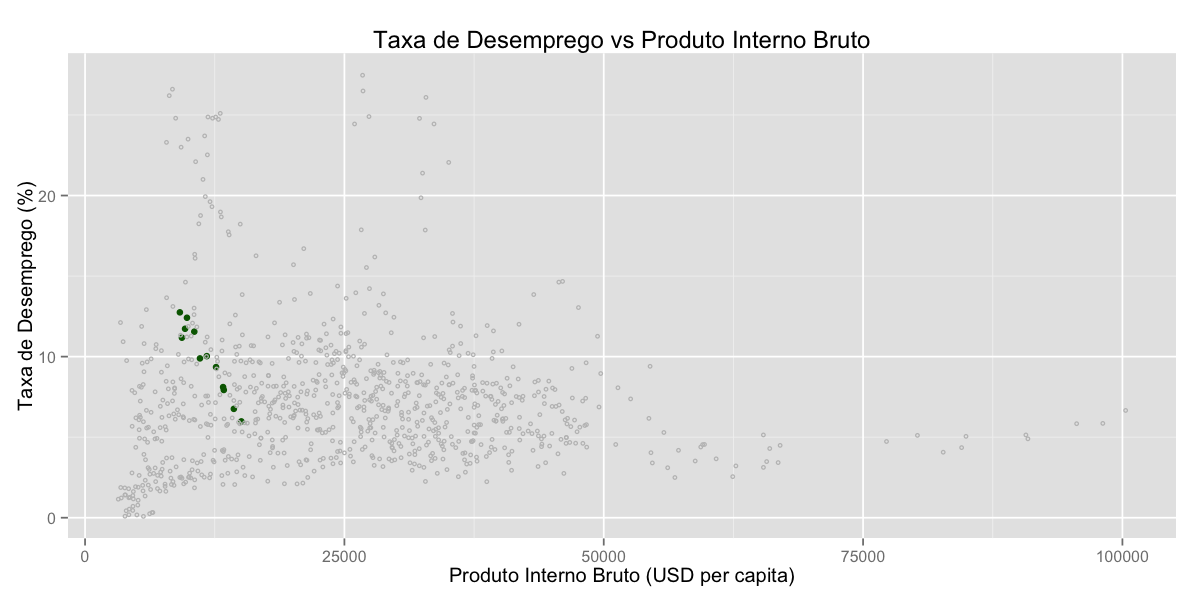

In [28]:
locations = paired.gdp.unemp$LOCATION
locations = locations[order(locations)]

# Pinta o Brasil de verde escuro
loc.colors = rep("gray75", length(locations))
loc.colors[locations == "BRA"] = "darkgreen"

loc.sizes = rep(1, length(locations))
loc.sizes[locations == "BRA"] = 1.5

loc.shapes = rep(1, length(locations))
loc.shapes[locations == "BRA"] = 19

options(repr.plot.height = 5)
ggplot(data=paired.gdp.unemp, aes(x=GDP, y=UNEMPLOYMENT, group=LOCATION)) +
    xlab("Produto Interno Bruto (USD per capita)") + ylab("Taxa de Desemprego (%)") +
    geom_point(shape=loc.shapes, color=loc.colors, size=loc.sizes) +
    ggtitle("Taxa de Desemprego vs Produto Interno Bruto")

#### b

In [29]:
gdp.unemp.cor = cor(paired.gdp.unemp$GDP, paired.gdp.unemp$UNEMPLOYMENT)

printf("A correlação é %.6f.", gdp.unemp.cor)

[1] "A correlação é -0.065243."


Como este valor é praticamente nulo, pode-se dizer que PIB e taxa de desemprego não são correlacionados.

#### c

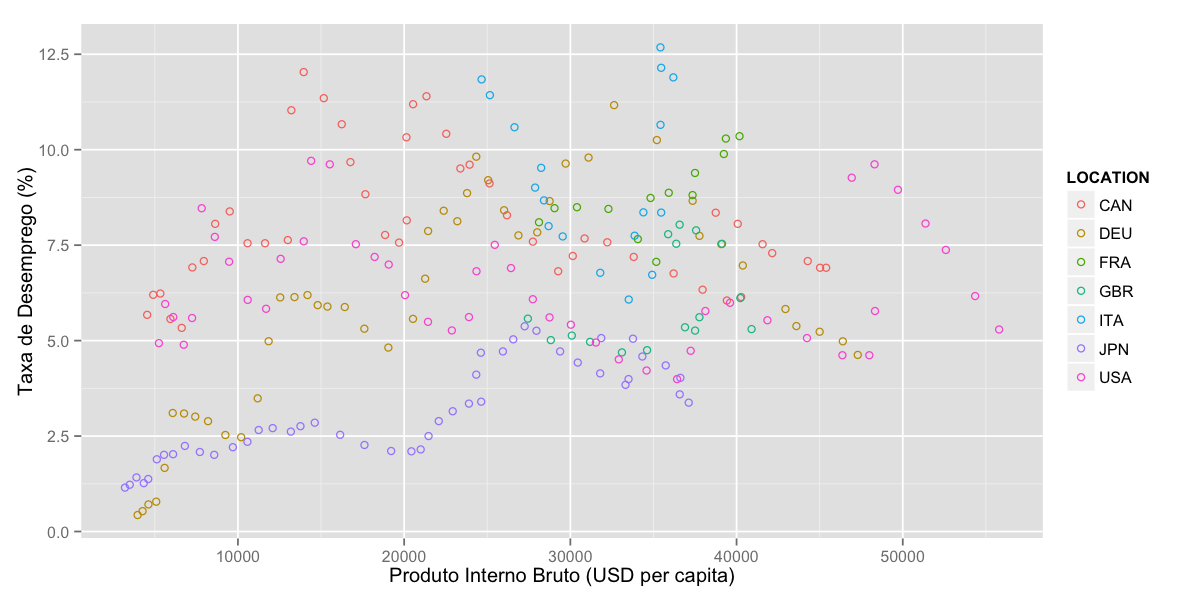

In [30]:
g7 = c("CAN", "FRA", "DEU", "ITA", "JPN", "GBR", "USA")

paired.gdp.unemp.g7 = paired.gdp.unemp[paired.gdp.unemp$LOCATION %in% g7,]
ggplot(data=paired.gdp.unemp.g7, aes(x=GDP, y=UNEMPLOYMENT, group=LOCATION, color=LOCATION)) +
    geom_point(shape=1) + xlab("Produto Interno Bruto (USD per capita)") + ylab("Taxa de Desemprego (%)")

#### d

[1] "O RMSE é 2.504795 e o R-squared é 0.114881."


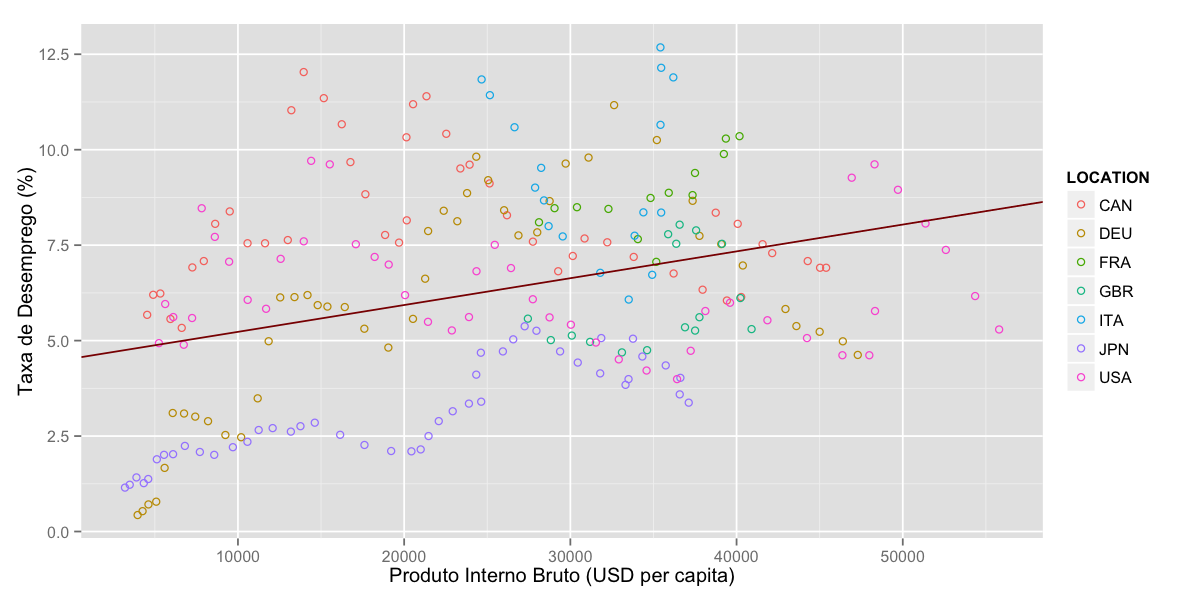

In [31]:
ls.model = lm(UNEMPLOYMENT ~ GDP, data = paired.gdp.unemp.g7)
# summary(ls.model)
least.squares.line = coef(ls.model)

rmse = sqrt(mean((paired.gdp.unemp.g7$UNEMPLOYMENT - fitted(ls.model))^2))

printf("O RMSE é %.6f e o R-squared é %.6f.", rmse, summary(ls.model)$r.squared)

ggplot(data=paired.gdp.unemp.g7, aes(x=GDP, y=UNEMPLOYMENT, group=LOCATION, color=LOCATION)) +
    geom_point(shape=1) + xlab("Produto Interno Bruto (USD per capita)") + ylab("Taxa de Desemprego (%)") +
    geom_abline(intercept = least.squares.line[1], slope = least.squares.line[2], color="darkred", size=0.5)

O _R-squared_ é uma medida relativa do _fit_ de nosso modelo aos dados. Ele indica que porcentagem da variância é explicada pelo modelo. Com um _R-squared_ de aproximadamente $0.115$, temos que apenas $11.5\%$ da variância é explicada por nosso modelo. Já o _RMSE_ é uma medida absoluta, indicando o quão distante o nosso modelo fica dos pontos de dados observados. Para o modelo acima, obtivemos um _RMSE_ de aproximadamente $2.5$.

Ordinarimente, um maior _R-squared_ indica um melhor _fit_ do modelo. Com $0.115$, não temos um bom _R-squared_.
De forma similar, um menor _RMSE_ indica um melhor _fit_ do modelo. Para avaliá-lo, porém, temos que ter uma noção da amplitude de nosso dados. De $0$ a $100$, por exemplo, um _RMSE_ de $2.5$ pode ser considerado um bom valor. De $0$ a $13$, aproximadamente, como é o caso, consideramos um valor alto e, portanto, ruim.

Ambas as asserções podem ser verificadas visualmente pelo nosso gráfico de dispersão.

#### e

In [32]:
gdp.unemp.cor.g7 = cor(paired.gdp.unemp.g7$GDP, paired.gdp.unemp.g7$UNEMPLOYMENT)

printf("A correlação é %.6f.", gdp.unemp.cor.g7)

[1] "A correlação é 0.338940."


Pode-se dizer que as variáveis PIB per capita e taxa de desemprego apresentam, para o conjunto de dados limitado aos países do G7, um grau de correlação **positivo moderado**.

## Clusterização das Taxas de Desemprego

### _Hierarchical Clustering_

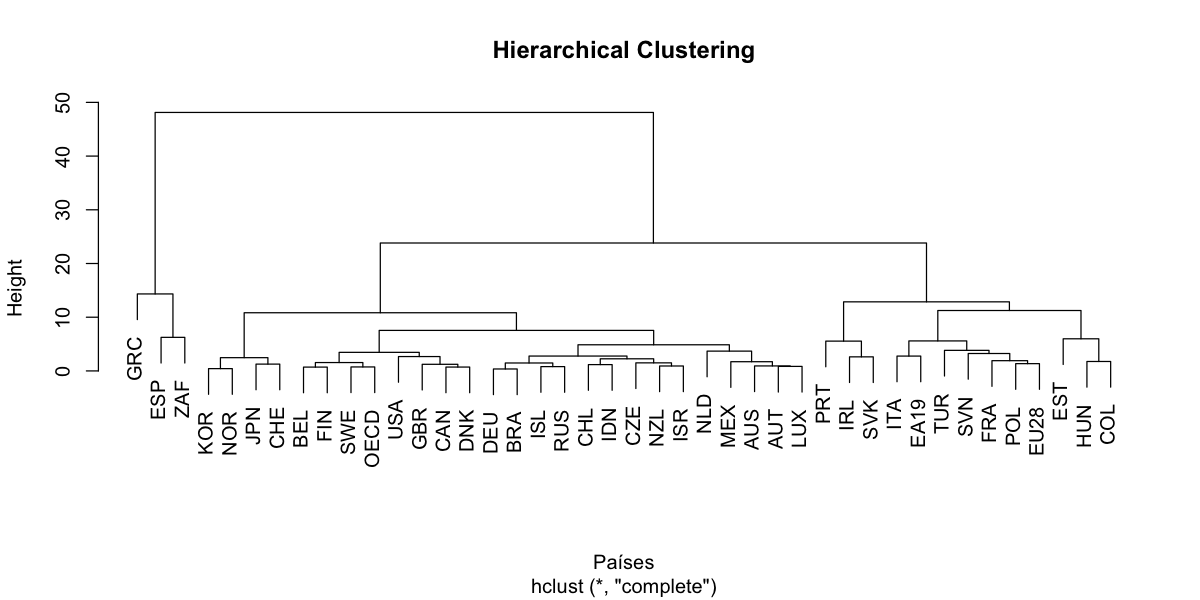

In [33]:
unemp.mat = data.year[data.year$TIME %in% 2010:2014, c("LOCATION", "Value", "TIME")]
unemp.mat = reshape(unemp.mat, v.names = "Value", idvar = "LOCATION", 
                    direction = "wide", timevar="TIME")
unemp.mat.noloc = unemp.mat
unemp.mat.noloc$LOCATION = NULL

unemp.mat.dist <- dist(unemp.mat.noloc)
h <- hclust(unemp.mat.dist)
plot(h, labels=unemp.mat$LOCATION, xlab="Países", main="Hierarchical Clustering")

### Clusterização Utilizando o K-Means

Pode-se ver acima que $k = 3$ seria um bom ponto de partida para a clusterização. Tentemos então com $k \in \{3,8,15\}$. As imagens abaixo exibem os _clusters_ que se pretendem obter para tais valores.

- $k = 3$
![k=3](http://i.imgur.com/VgTLQCr.png)

- $k = 8$
![k=8](http://i.imgur.com/O5HhlVS.png)

- $k = 15$
![k=15](http://i.imgur.com/PhZG5TA.png)

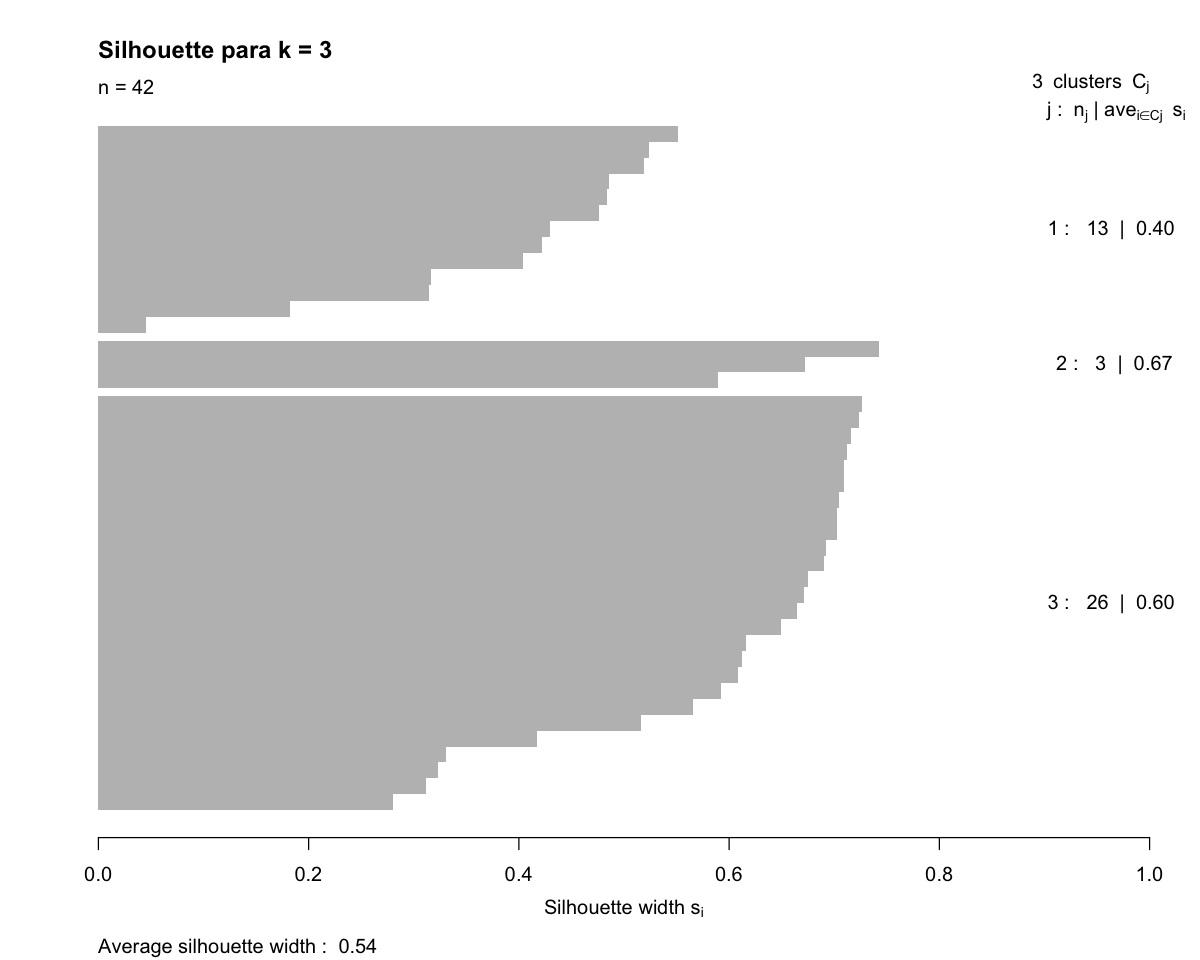

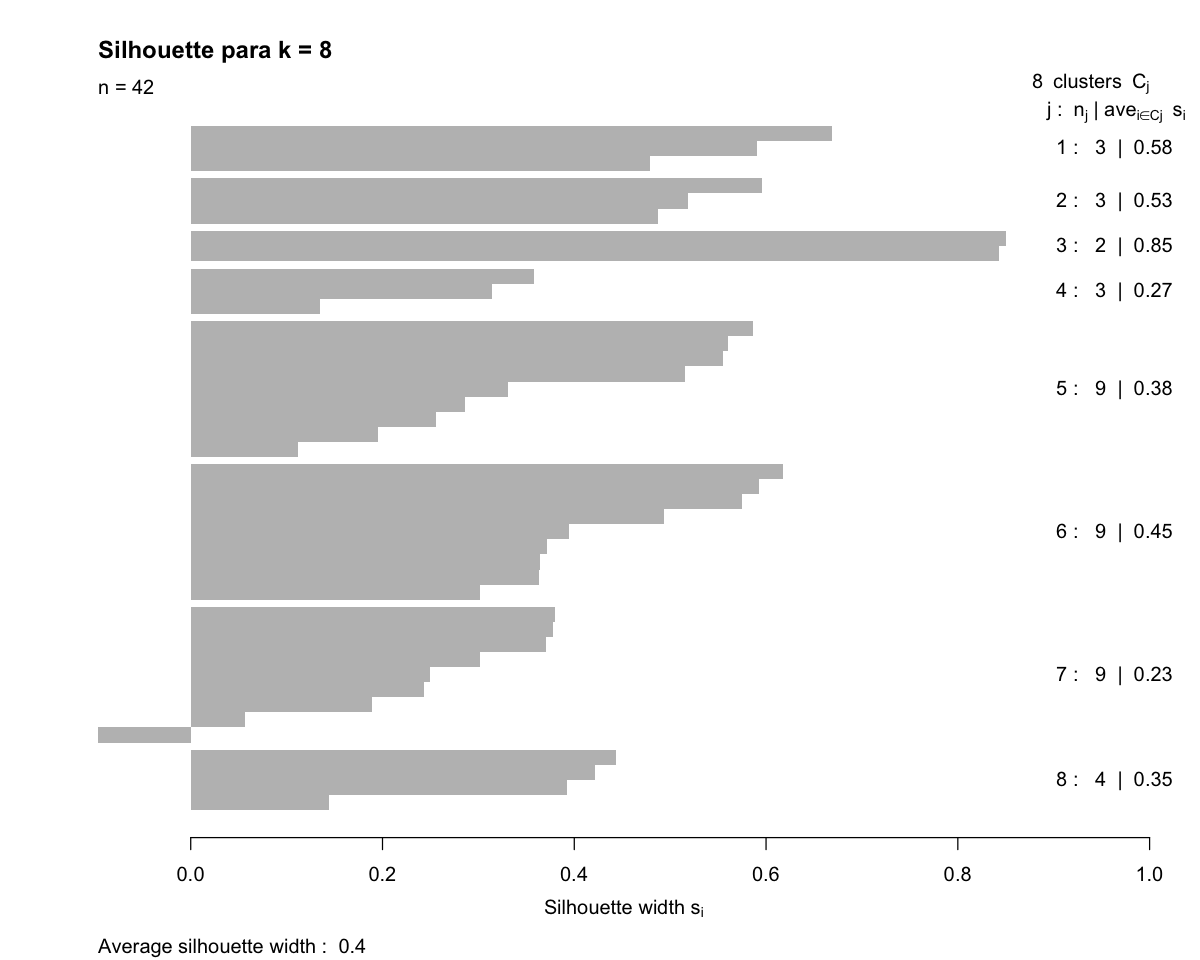

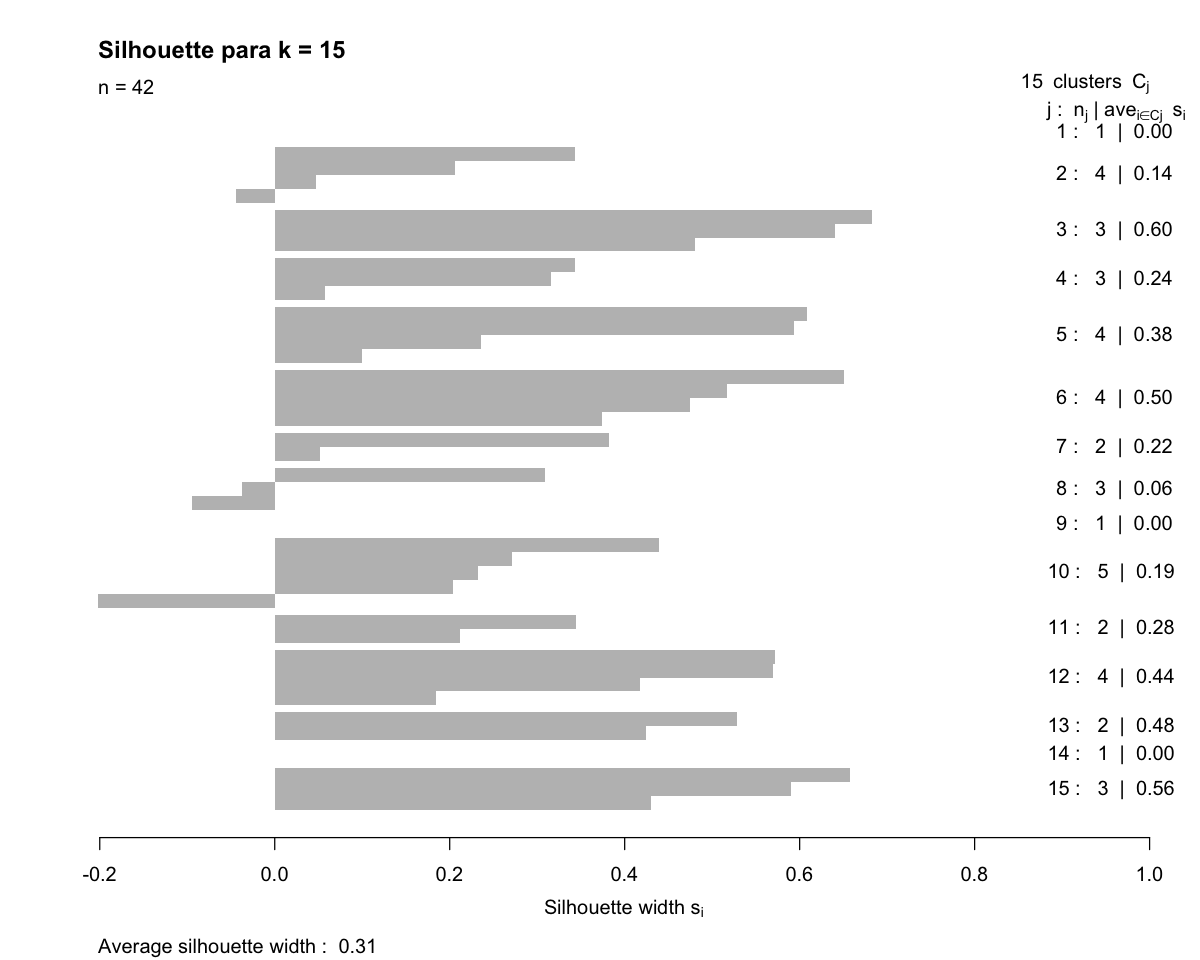

In [37]:
load.lib("cluster")

options(repr.plot.height = 8)
for (k in c(3,8,15)) {
    clusters = kmeans(unemp.mat.noloc, k, iter.max = 100)
    plot(silhouette(clusters$cl, unemp.mat.dist), 
         main=paste("Silhouette para k = ", k, sep=""))
}

A melhor clusterização portanto foi obtida para $k = 3$, visto que sua _silhouette_ apresentou o maior comprimento médio. Como pode-se observar, para $k = 3$ os elementos tem, em sua grande maioria, um alto grau de proximidade com os demais de seu grupo; por outro lado, nas demais clusterizações, observa-se uma queda expressiva nesta métrica, havendo inclusive alguns elementos mais próximos de outros grupos do que de seu próprio. 